In [1]:
import os
import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import spacy
from spacy import displacy
from top2vec import Top2Vec
from wordcloud import WordCloud, STOPWORDS

from config import Config
from preprocessing.sentiment_analysis import get_sentiment

In [3]:
#nlp = spacy.load('Jodie')
nlp = spacy.load('en_core_web_lg')

In [3]:
file_name = '0001104659-06-084288.txt'
data_file = os.path.join(Config.risk_dir(), file_name)

In [4]:
with open(data_file, 'r') as df:
    data = df.read()

In [5]:
STOPWORDS.add('company')

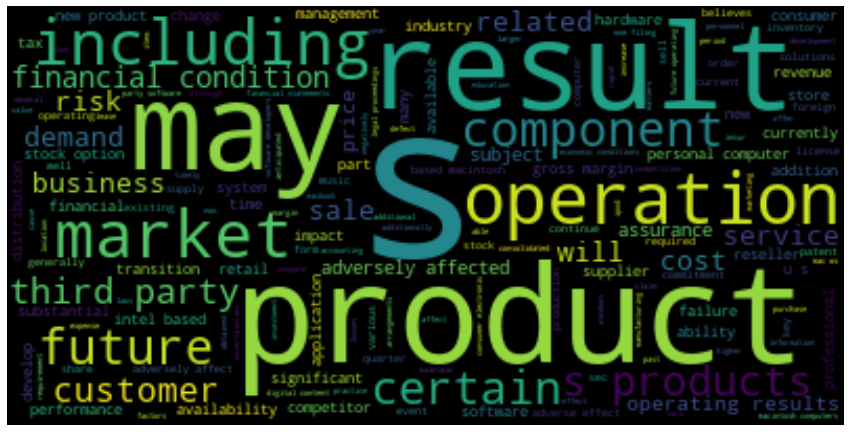

In [7]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(data.lower())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
doc = nlp(data)

In [7]:
sents = list(doc.sents)

In [8]:
# Render the dependency parse immediately inside Jupyter:
displacy.render(sents[15], style='ent', jupyter=True,
                options={'distance': 110})

In [9]:
list(sents[0].noun_chunks)

[the following factors,
 other factors,
 the Company’s operating results,
 financial condition,
 financial performance,
 a reliable indicator,
 future performance,
 investors,
 historical trends,
 results,
 trends,
 future periods]

In [10]:
# Perform sentiment analysis on the doc
res = get_sentiment(data)

In [11]:
print('Distribution: ')
print(res['prediction'].value_counts())

Distribution: 
neutral     151
negative     93
positive     29
Name: prediction, dtype: int64


In [17]:
print('Example of a sentence that has been classified as having negative sentiment:')
print(res.loc[res.prediction == 'negative', 'sentence'].iloc[1])
print()
print('Example of a sentence that has been classified as having neutral sentiment:')
print(res.loc[res.prediction == 'neutral', 'sentence'].iloc[10])
print()
print('Example of a sentence that has been classified as having neutral sentiment:')
print(res.loc[res.prediction == 'positive', 'sentence'].iloc[4])

Example of a sentence that has been classified as having negative sentiment:
On June 29, 2006, the Company announced that an internal review had discovered irregularities related to the issuance of certain stock option grants made between 1997 and 2001, including a grant to its Chief Executive Officer (“CEO”), Steve Jobs.

Example of a sentence that has been classified as having neutral sentiment:
With the filing of this Form 10-K, the Company believes that it has remedied its non-compliance with Marketplace Rule 4310(c)(14), subject to NASDAQ’s affirmative completion of its compliance protocols and its notification of the Company accordingly.

Example of a sentence that has been classified as having neutral sentiment:
Additionally, there has been a trend towards consolidation in the personal computer industry that has resulted in larger and potentially stronger competitors in the Company’s markets.


In [18]:
neg_sentences = ' '.join(
    res.loc[res.prediction == 'negative', 'sentence'].values)

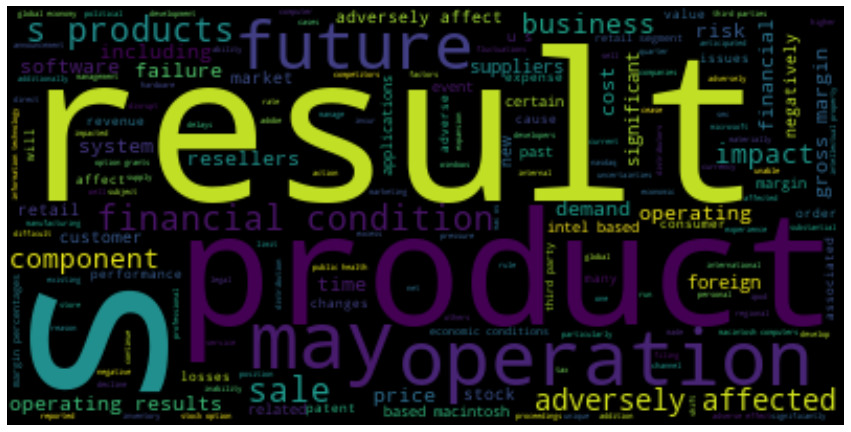

In [19]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(neg_sentences.lower())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [2]:
corpus = []
risk_file_names = glob.glob(os.path.join(Config.risk_dir(), '10k20f_5', '*.txt'))
for risk_file_name in tqdm(risk_file_names):
    with open(risk_file_name, 'r', encoding='utf-8') as risk_file:
        #import pdb; pdb.set_trace()
        docu = risk_file.read()
        if len(word_tokenize(docu)) > 100:
            corpus.append(docu)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3096/3096 [01:58<00:00, 26.10it/s]


In [10]:
print(f'Out of {len(risk_file_names)}, {len(corpus)} had valid text.')

Out of 3096, 1953 had valid text.


In [ ]:
#model = Top2Vec(corpus, speed='learn', workers=8)

2020-11-28 13:48:16,250 - top2vec - INFO - Pre-processing documents for training
2020-11-28 13:48:59,777 - top2vec - INFO - Creating joint document/word embedding


In [11]:
model = Top2Vec.load('top2vec_model_deep')

In [12]:
print(f'Number of topics: {model.get_num_topics()}')

Number of topics: 31


In [13]:
model.get_topics()

(array([['frontier', 'councils', 'quad', ..., 'unions', 'aviation',
         'multiemployer'],
        ['unitholders', 'partnership', 'contentsindex', ...,
         'compression', 'mined', 'methane'],
        ['solutions', 'saas', 'software', ..., 'attention', 'memberships',
         'customers'],
        ...,
        ['aircraft', 'airline', 'lessees', ..., 'jet', 'shipping',
         'reorganizations'],
        ['loan', 'loans', 'noninterest', ..., 'inadequately', 'governors',
         'mortgage'],
        ['hotels', 'hotel', 'lodging', ..., 'franchising', 'improvements',
         'underinsured']], dtype='<U15'),
 array([[0.35758835, 0.35078293, 0.34462705, ..., 0.25954553, 0.25869513,
         0.2583104 ],
        [0.6173268 , 0.5460856 , 0.5297511 , ..., 0.3210952 , 0.3185597 ,
         0.3178021 ],
        [0.6808616 , 0.5496794 , 0.54155946, ..., 0.2784946 , 0.27594453,
         0.27460632],
        ...,
        [0.7766695 , 0.680389  , 0.6693871 , ..., 0.28494453, 0.28412613,
   

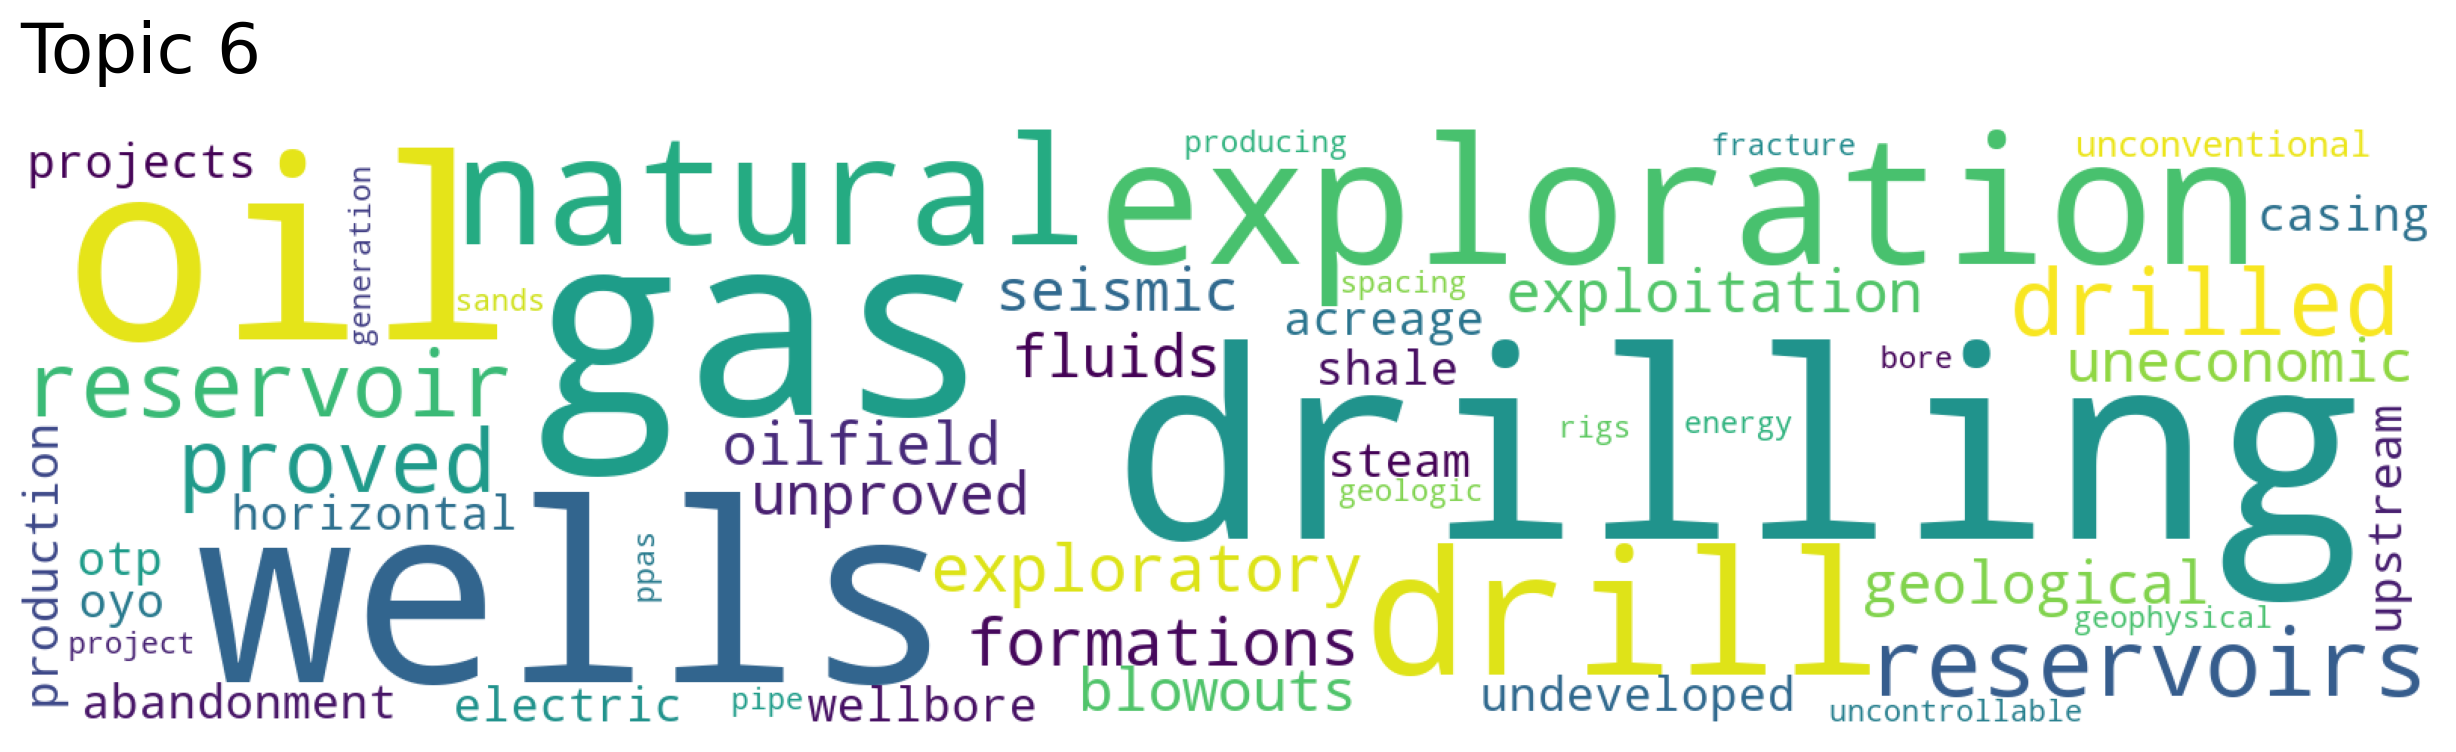

In [20]:
model.generate_topic_wordcloud(topic_num=6, background_color='white')

In [21]:
model.search_documents_by_topic(topic_num=6, num_docs=1)

(array(['The nature of our business activities subjects us to certain hazards and risks. The following is a summary of some of the material risks relating to our business activities. Other risks are described in “Item 1. Business” and “Item 7A. Quantitative and Qualitative Disclosures About Market Risk.” These risks are not the only risks we face. We could also face additional risks and uncertainties not currently known to the Company or that we currently deem to be immaterial. If any of these risks actually occurs, it could materially harm our business, financial conditional or results of operations and the trading price of our shares could decline.Risks Related to the Oil and Natural Gas Industry and Our BusinessA significant portion of our net leasehold acreage is undeveloped, and that acreage may not ultimately be developed or become commercially productive, which could cause us to lose rights under our leases as well as have a material adverse effect on our oil and natural gas res

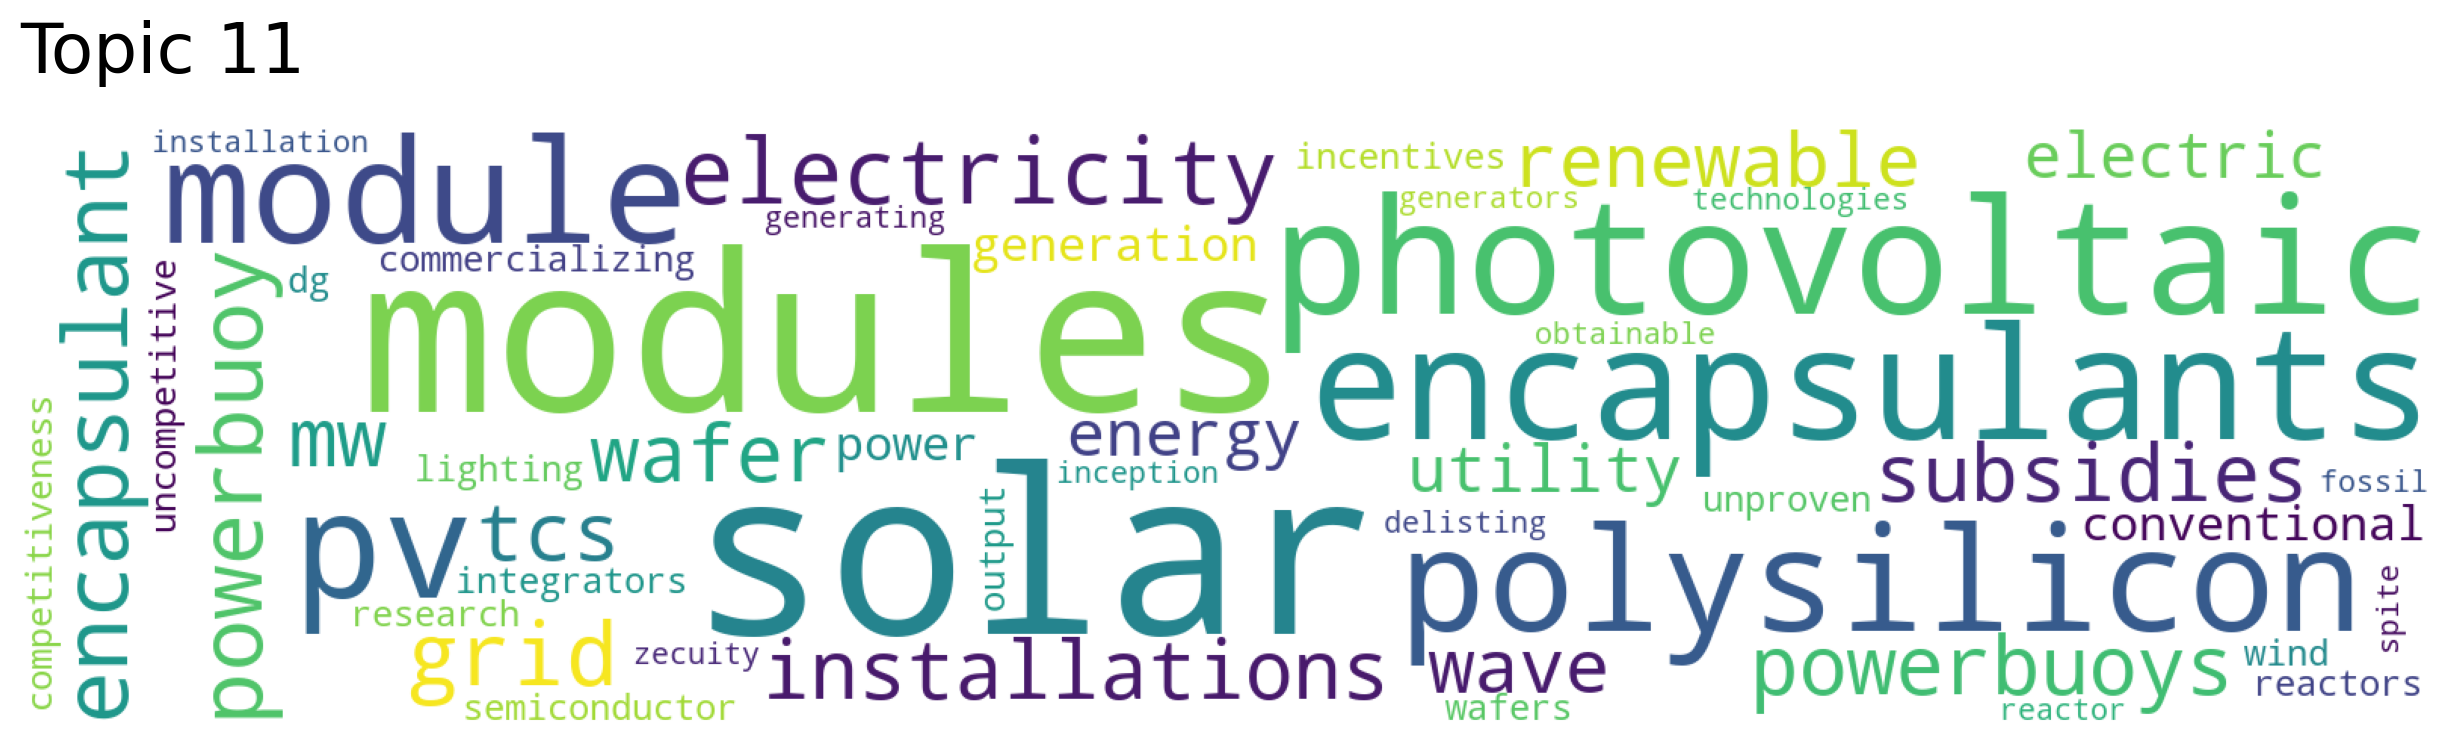

In [15]:
model.generate_topic_wordcloud(topic_num=11, background_color='white')

In [17]:
model.search_documents_by_topic(11, 1)

(array(["Risk FactorsThere are numerous and varied risks, known and unknown, that may prevent us from achieving our goals. If any of these risks actually occur, our business, prospects, financial condition or results of operation may be materially adversely affected. In such case, the trading price of our common stock could decline and investors could lose all or part of their investment.Risks Related to our BusinessWe have a limited operating history upon which an evaluation of our prospects can be made. We may never achieve profitability.Our operating subsidiary, Magnolia Solar, wasorganized on January 8, 2008, and has had only limited operations since our inception upon which to evaluate our business prospects. As a result, investors do not have access to the same type of information in assessing their proposed investment as would be available to purchasers in a company with a history of prior operations. Although the technology for solar cells we are commercializing has been develo

In [31]:
#model.save('top2vec_model')

In [29]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=['debt', 'oil', 'gas', 'drill'], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f'Document: {doc_id}, Score: {score}')
    print('-----------')
    print(doc[:20])
    print('-----------')
    print()

Document: 100, Score: 0.6672
-----------
You should carefully
-----------

Document: 435, Score: 0.612
-----------
The nature of our bu
-----------

Document: 154, Score: 0.6056
-----------
The nature of our bu
-----------

Document: 841, Score: 0.6043
-----------
Our business involve
-----------

Document: 1878, Score: 0.5902
-----------
The nature of our bu
-----------



In [4]:
from bertopic import BERTopic

In [5]:
bert_model = BERTopic("distilbert-base-nli-mean-tokens", verbose=True)

In [6]:
topics, probabilities = bert_model.fit_transform(corpus)

2020-12-09 00:29:02,586 - BERTopic - Loaded BERT model
2020-12-09 00:47:41,105 - BERTopic - Transformed documents to Embeddings
2020-12-09 00:47:57,199 - BERTopic - Reduced dimensionality with UMAP
2020-12-09 00:47:57,395 - BERTopic - Clustered UMAP embeddings with HDBSCAN


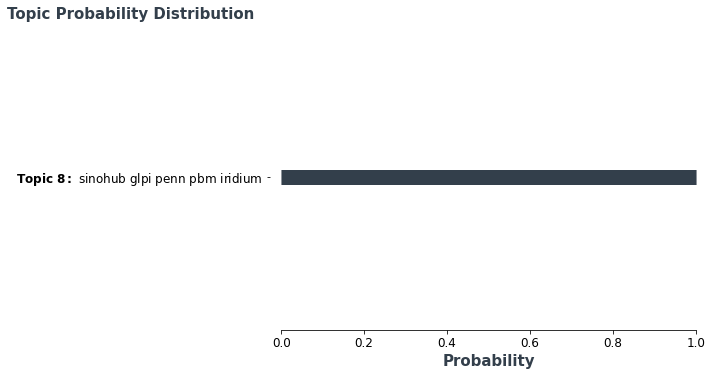

In [25]:
bert_model.visualize_distribution(probabilities[2])

In [7]:
bert_model.get_topics()

{-1: [('prcm', 0.0008464044409016928),
  ('pine', 0.0007195163780992992),
  ('river', 0.0006329335151639479),
  ('harbors', 0.000629106965682841),
  ('jpmorgan', 0.0005995051398706026),
  ('dialysis', 0.0005444160163775469),
  ('shengda', 0.00047483245049196823),
  ('outdoor', 0.00046461751096468567),
  ('displays', 0.0004181902231161259),
  ('reuse', 0.0004136221155490294),
  ('iheartcommunications', 0.00039499794217790087),
  ('chase', 0.00039013398329621396),
  ('advisers', 0.00039010094875868397),
  ('dialyzers', 0.0003875173702419874),
  ('taibang', 0.0003664997290297009),
  ('stations', 0.00034181580854322926),
  ('circular', 0.0003321848755140057),
  ('rady', 0.00032611444635184607),
  ('guizhou', 0.0003207237568690416),
  ('multifamily', 0.00032012448004481637)],
 0: [('hiland', 0.000541342124040599),
  ('pollo', 0.0004814514490527152),
  ('cabana', 0.0004757501225054674),
  ('taco', 0.0004618533936685279),
  ('gasification', 0.00046085755172624705),
  ('pizza', 0.0004544152193